In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos









In [2]:
env = gymnasium.make('highway-fast-v0', render_mode='rgb_array',max_episode_steps=-1)

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env)

In [4]:
NUM_EPISODES = 1000
total_rewards = []
env.reset()
# env = record_videos(env)

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  total_reward = 0
  done = truncated = False

  obs, info = env.reset()
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    total_reward += reward
    agent.learn(obs.flatten(),action,reward,(done,next_obs.flatten()))

    obs=next_obs
  total_rewards.append(total_reward)
  print(f"Total Reward: {total_reward}")


Episode 0
Total Reward: 8.733333333333336
Episode 1
Total Reward: 2.533333333333333
Episode 2
Total Reward: 6.699999999999999
Episode 3
Total Reward: 16.133333333333336
Episode 4
Total Reward: 19.13333333333334
Episode 5
Total Reward: 5.7333333333333325
Episode 6
Total Reward: 3.9999999999999996
Episode 7
Total Reward: 7.199999999999999
Episode 8
Total Reward: 4.8
Episode 9
Total Reward: 20.033333333333335
Episode 10
Total Reward: 4.8
Episode 11
Total Reward: 24.00000000000001
Episode 12
Total Reward: 3.1999999999999997
Episode 13
Total Reward: 12.533333333333335
Episode 14
Total Reward: 6.0
Episode 15
Total Reward: 15.033333333333337
Episode 16
Total Reward: 10.4
Episode 17
Total Reward: 16.133333333333336
Episode 18
Total Reward: 4.533333333333334
Episode 19
Total Reward: 20.800000000000008
Episode 20
Total Reward: 17.53333333333334
Episode 21
Total Reward: 3.533333333333333
Episode 22
Total Reward: 6.3999999999999995
Episode 23
Total Reward: 10.866666666666667
Episode 24
Total Rewar

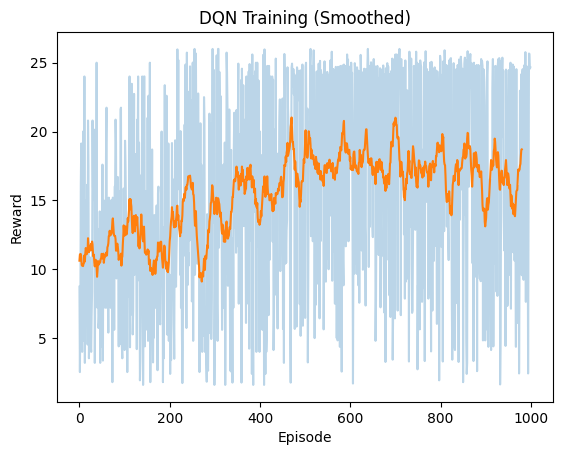

In [5]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [6]:
NUM_EPISODES = 10
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config={"duration":80,"vehicles_count": 50})

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 25.0, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 1.0, 'high_speed_reward': np.float64(0.5), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.6666666666666666), 'high_speed_reward': np.float64(0.4944220488427259), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.3333333333333333), 'high_speed_reward': np.float64(0.4933994436776903), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.4933243205989683), 'on_road_reward': 1.0}}
{'speed': 25.0, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.49995048701481226), 'on_road_reward

AttributeError: 'NoneType' object has no attribute 'get_image'